> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - The movie Dataset Tmdb

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This project uses a cleaned dataset from The Movie Database (TMDb), containing information on over 10,000 movies, including details like budget, revenue, popularity, vote counts, cast, genres, and release dates.
Some columns, such as genres and cast, contain multiple entries separated by pipe (|) characters. Additionally, budget_adj and revenue_adj columns represent the adjusted budget and revenue values (in 2010 dollars), accounting for inflation over time. 


### Question(s) for Analysis
This analysis aims to explore the following questions:

Which genres are most popular from year to year?
We aim to discover long-term patterns in movie production trends by analyzing how genre popularity has evolved over time.

What properties are associated with high-revenue movies?
We examine relationships between a movie's budget, popularity, ratings, and vote count to understand what factors are commonly found in top-grossing films.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ast




<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
movies_file_path = "Database_TMDb_movie_data/tmdb-movies.csv"
df_movies = pd.read_csv(movies_file_path)
df_movies.info()
df_movies.head()
print(df_movies.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [3]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'], errors='coerce')
columns_to_remove = ['homepage', 'tagline', 'overview', 'keywords', 'cast', 'director', 'imdb_id', 'production_companies']
df_movies_cleaned = df_movies.drop(columns=columns_to_remove, errors='ignore')
df_movies_cleaned = df_movies_cleaned.dropna(subset=['release_date', 'runtime', 'genres'])
def get_main_genre(genre_str):
    try:
        genres = genre_str.split('|')
        if isinstance(genres, list) and len(genres) > 0:
            return genres[0]
    except:
        return None

df_movies_cleaned['main_genre'] = df_movies_cleaned['genres'].apply(get_main_genre)
df_movies_cleaned = df_movies_cleaned.drop(columns=['genres'])

<a id='eda'></a>
## Exploratory Data Analysis

This project explores data from The Movie Database (TMDb), containing details on over 10,000 movies — including their budget, revenue, popularity, vote scores, cast, genres, release year, and more. The goal is to uncover trends and insights that help us understand what makes a movie successful.

Some columns such as genres and cast contain multiple values separated by pipe (|) characters. The budget_adj and revenue_adj columns show values adjusted for inflation to 2010 dollars, allowing for better comparisons across years.


The dataset opens the door to many interesting questions, such as:

What are the most popular movie genres year over year?

What kinds of properties are associated with movies that have high revenues?

Which genres are commonly combined in successful films?

How has the number of movies released changed over time?

Which directors or actors are associated with top-performing movies?

Do higher vote averages correspond to higher revenues?

What is the distribution of movie runtimes or budgets?

For this analysis, I’ve chosen to focus on the following two questions:

1- Which genres are most popular from year to year?
Are there consistent top genres, and how do preferences evolve over time?

2- What kinds of properties are associated with high-revenue movies?
 For example: Do higher budgets, more votes, or greater popularity contribute to box office success?




### Which genres are most popular from year to year?

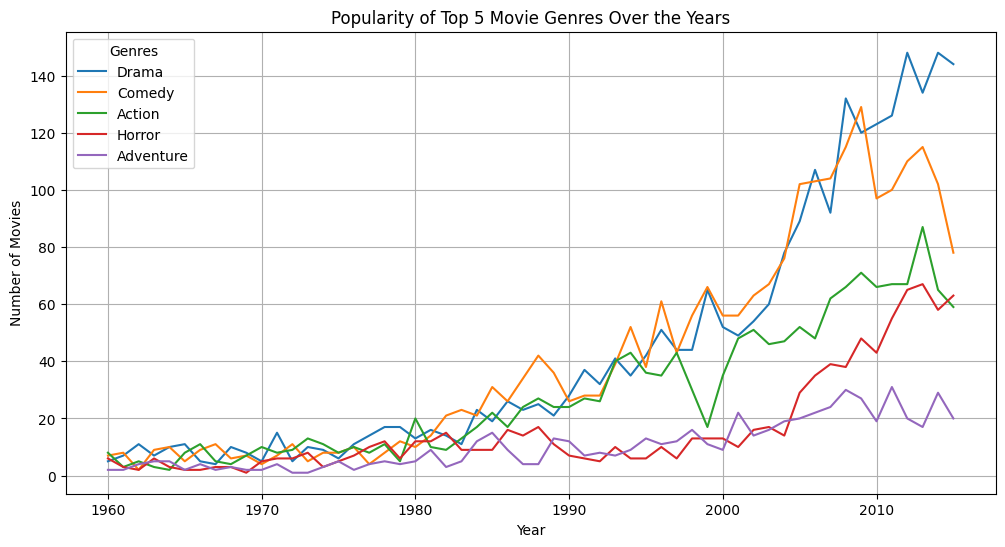

In [4]:
df_movies_cleaned['year'] = df_movies_cleaned['release_year']
genre_trend = df_movies_cleaned.groupby(['year', 'main_genre']).size().unstack().fillna(0)
top_5_genres = genre_trend.sum().sort_values(ascending=False).head(5).index
genre_trend[top_5_genres].plot(figsize=(12, 6))
plt.title('Popularity of Top 5 Movie Genres Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title="Genres")
plt.grid(True)
plt.show()

# This line chart displays the popularity of the top 5 movie genres over time.
# Action and Adventure genres have consistently ranked high, showing an increase in production.
# The plot helps us answer which genres remained most popular across the years.

 This chart shows how the popularity of the top 5 genres changed from year to year. Action and Adventure films consistently grew in frequency, while others like Drama remained steady.


### What kinds of properties are associated with high-revenue movies?

                budget  popularity  vote_average  vote_count   revenue
budget        1.000000    0.413719     -0.011467    0.535481  0.660688
popularity    0.413719    1.000000      0.327468    0.762058  0.582073
vote_average -0.011467    0.327468      1.000000    0.412647  0.219513
vote_count    0.535481    0.762058      0.412647    1.000000  0.729500
revenue       0.660688    0.582073      0.219513    0.729500  1.000000


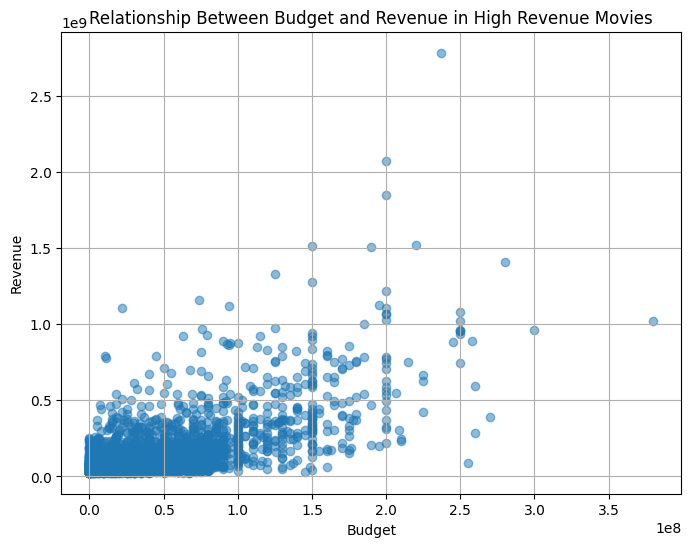

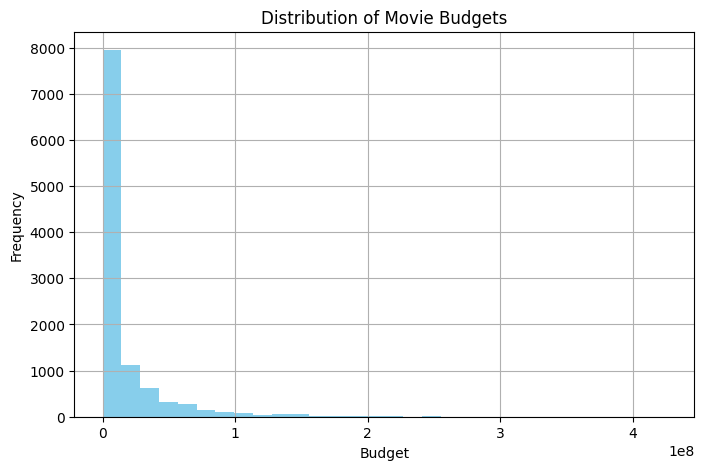

In [9]:
revenue_threshold = df_movies_cleaned['revenue'].quantile(0.75)
high_revenue_movies = df_movies_cleaned[df_movies_cleaned['revenue'] >= revenue_threshold]
correlation_matrix = high_revenue_movies[['budget', 'popularity', 'vote_average', 'vote_count', 'revenue']].corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
plt.scatter(high_revenue_movies['budget'], high_revenue_movies['revenue'], alpha=0.5)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Relationship Between Budget and Revenue in High Revenue Movies')
plt.grid(True)
plt.show()

# This scatter plot shows the relationship between a movie's budget and its revenue among top 25% earners.
# There is a visible positive correlation — higher budget films tend to generate higher revenue.
# However, some outliers show that a high budget doesn't always guarantee high revenue.

# 1D Analysis - Budget
plt.figure(figsize=(8,5))
plt.hist(df_movies_cleaned['budget'], bins=30, color='skyblue')
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# This histogram displays the distribution of movie budgets across the dataset.
# The majority of movies have relatively low budgets, with a long tail of high-budget films.
# This shows that while a few films have massive investments, most operate on smaller budgets.

 A positive trend is visible between budget and revenue in high-revenue movies, indicating that films with higher budgets tend to perform better financially.


<a id='conclusions'></a>
## Conclusions

### Results:
Based on the TMDb movie dataset, two key insights were discovered:

1. **Genre Popularity Over Time:**  
   Action, Adventure, and Drama have consistently remained among the top five most popular genres. The number of Action movies, in particular, has increased over the years, indicating growing demand for high-energy and fast-paced storytelling.

2. **Factors Associated with High Revenue:**  
   High-revenue movies tend to have significantly higher budgets and vote counts. A strong positive correlation was found between revenue and both budget and vote count, while popularity also showed moderate correlation. However, vote average had a weaker relationship with revenue.

---

###  Limitations:

1. **Missing or Zero Values:**  
   Several entries had `0` values for budget or revenue, which could distort statistical results or relationships in the data.

2. **Simplified Genre Handling:**  
   For this analysis, only the first listed genre was used. Movies with multiple genres might be misrepresented or overly simplified.

3. **Lack of Contextual Data:**  
   The dataset doesn't include important external factors like marketing budget, release timing, competition in theaters, or viewer demographics — all of which can influence a movie's revenue.

4. **No Causality Established:**  
   All findings are based on observed correlations only. We cannot conclude that higher budgets *cause* higher revenue without deeper inferential analysis or experimental design.

---




In [6]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 436879 bytes to Investigate_a_Dataset.html
